# Análise de Vendas

In [3]:
import pandas as pd

In [4]:
alucar = pd.read_csv('alucar.csv')

In [5]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar.mes = pd.to_datetime(alucar.mes)

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

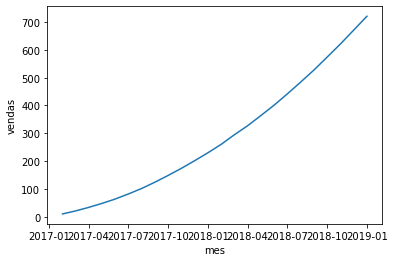

In [10]:
sns.lineplot(x='mes', y='vendas', data = alucar)

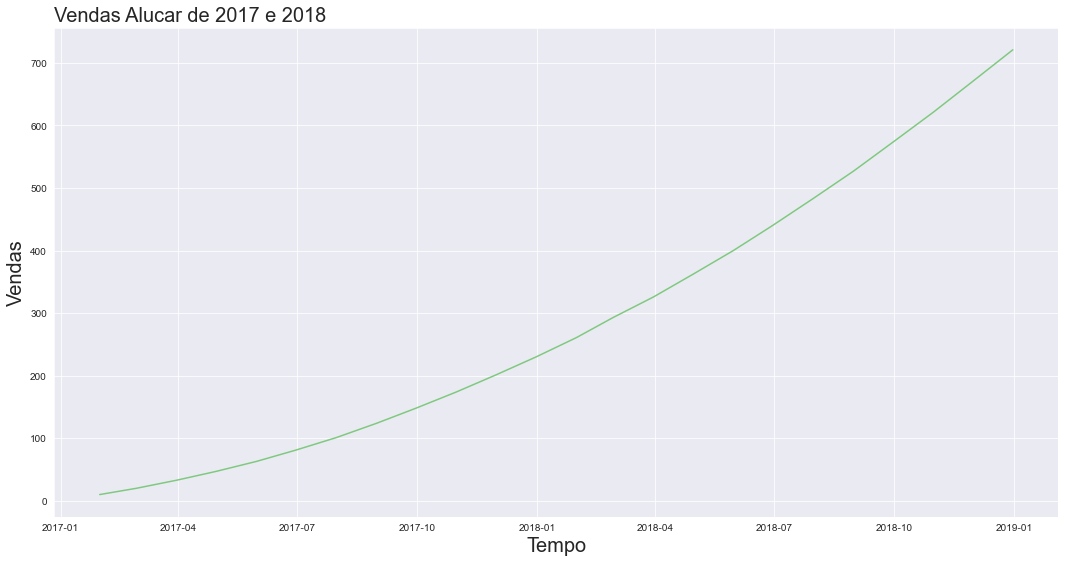

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = alucar)
ax.figure.set_size_inches(18,9)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 20)
ax.set_xlabel('Tempo', fontsize = 20)
ax.set_ylabel('Vendas', fontsize = 20)
ax = ax


In [12]:
alucar['aumento'] = alucar.vendas.diff()

In [13]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


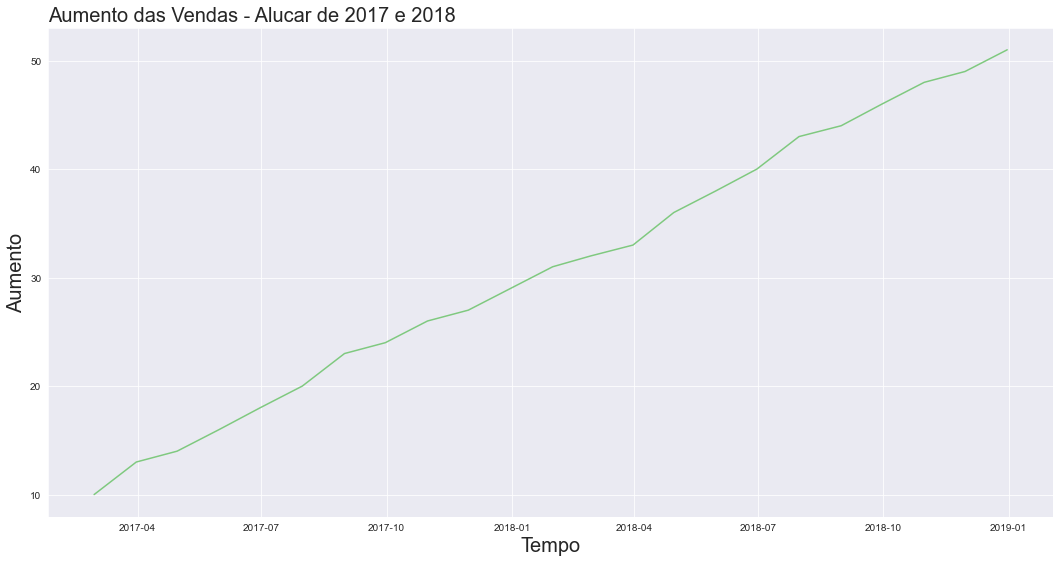

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data = alucar)
ax.figure.set_size_inches(18,9)
ax.set_title('Aumento das Vendas - Alucar de 2017 e 2018', loc = 'left', fontsize = 20)
ax.set_xlabel('Tempo', fontsize = 20)
ax.set_ylabel('Aumento', fontsize = 20)
ax = ax


In [15]:
def plotar(titulo, xlabel, ylabel, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data = dataset)
    ax.figure.set_size_inches(18,9)
    ax.set_title(titulo, loc = 'left', fontsize = 20)
    ax.set_xlabel(xlabel, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20)
    ax = ax


In [16]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


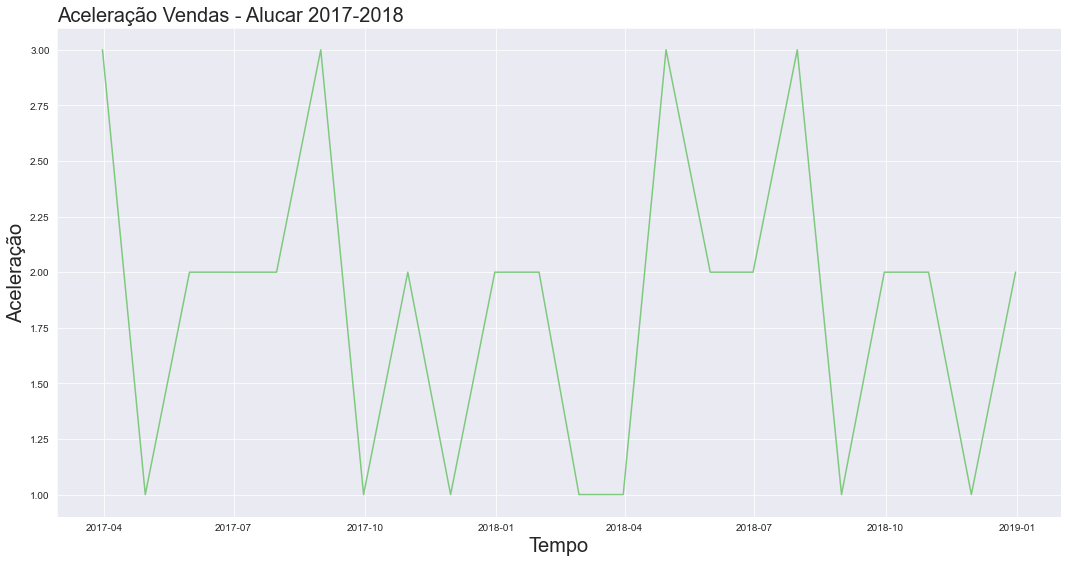

In [17]:
plotar('Aceleração Vendas - Alucar 2017-2018', 'Tempo', 'Aceleração', 'mes','aceleracao',alucar)

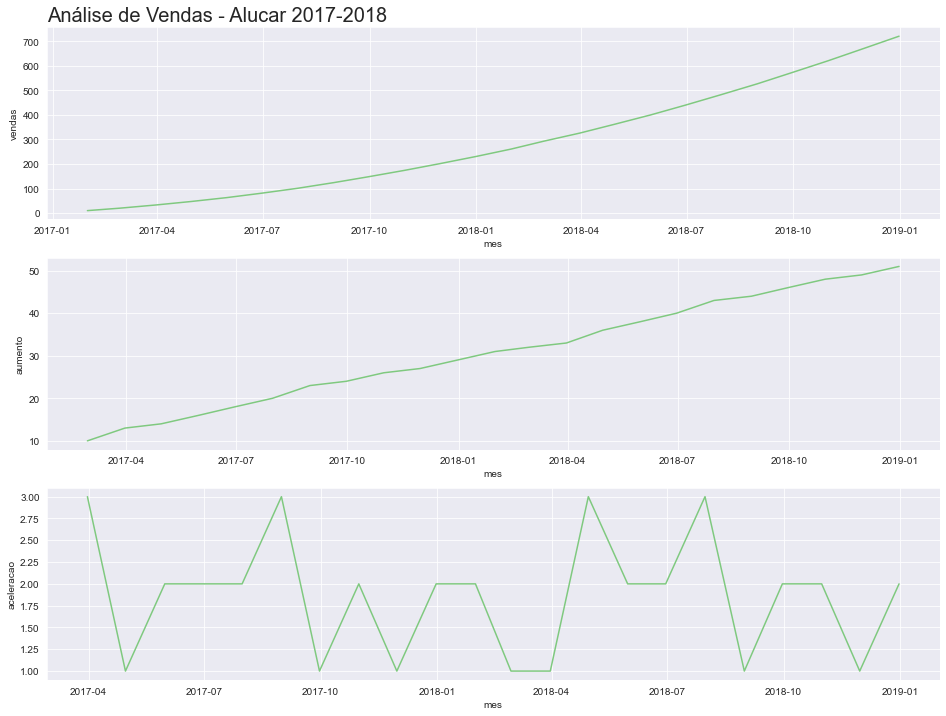

In [18]:
plt.figure(figsize = (16,12) )
ax =plt.subplot(3,1,1)
ax.set_title('Análise de Vendas - Alucar 2017-2018', fontsize = 20, loc = 'left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax = ax

In [19]:
def plot_comparacao(x, y1, y2, y3, titulo, dataset):
    plt.figure(figsize = (16,12) )
    ax =plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 20, loc = 'left')
    sns.lineplot(x=x, y=y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

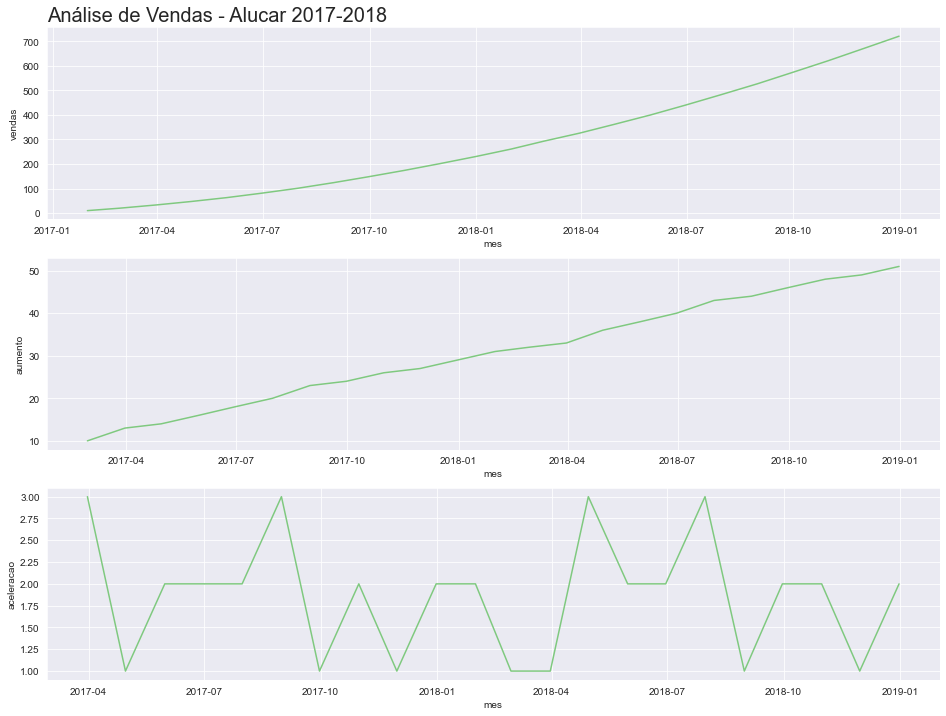

In [20]:
plot_comparacao('mes','vendas','aumento','aceleracao','Análise de Vendas - Alucar 2017-2018', alucar)

In [21]:
from pandas.plotting import autocorrelation_plot

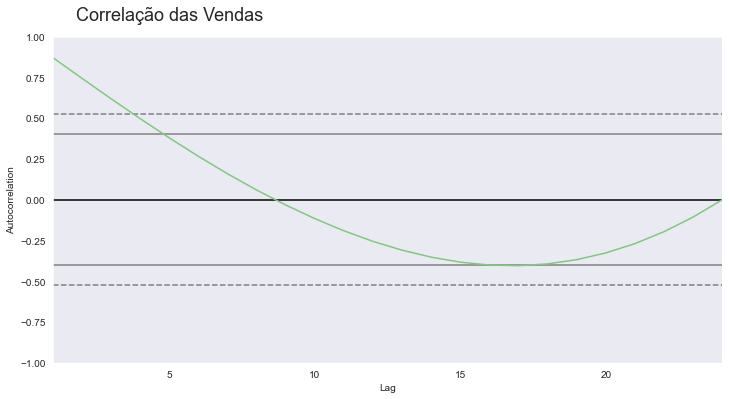

In [22]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

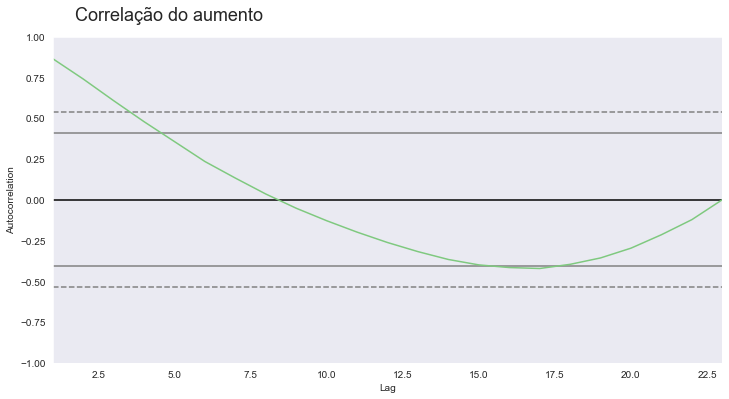

In [23]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

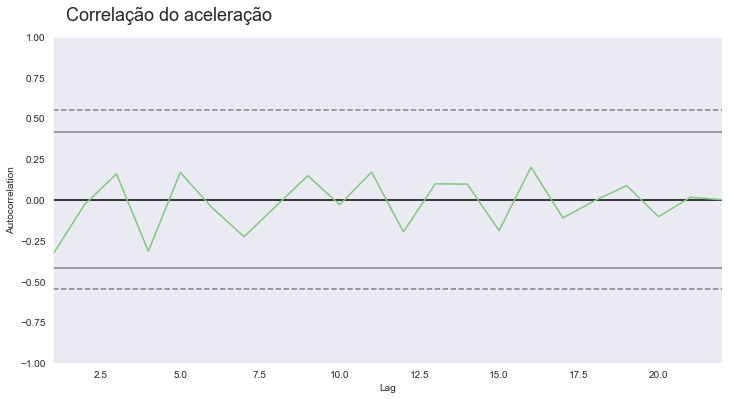

In [24]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aceleração', fontsize = 18, x = 0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [25]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


# Análise de assinantes da Newsletter

In [26]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [27]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [28]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [29]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [30]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes.head()


,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


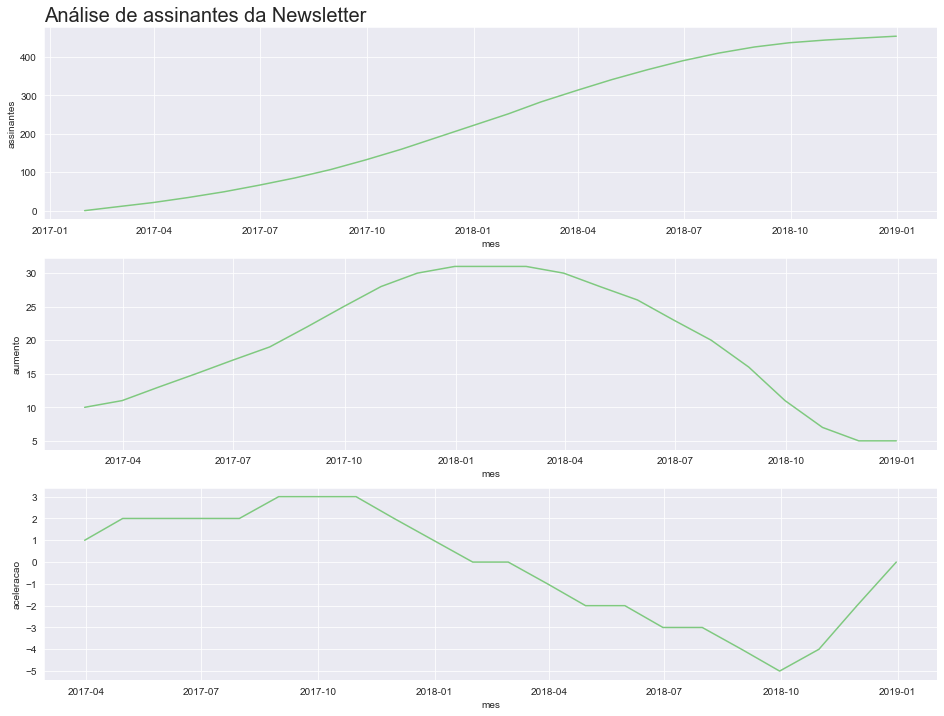

In [31]:
plot_comparacao('mes','assinantes','aumento','aceleracao','Análise de assinantes da Newsletter',assinantes)

# Análise da Chocolura

In [32]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [33]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [34]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()
chocolura


,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


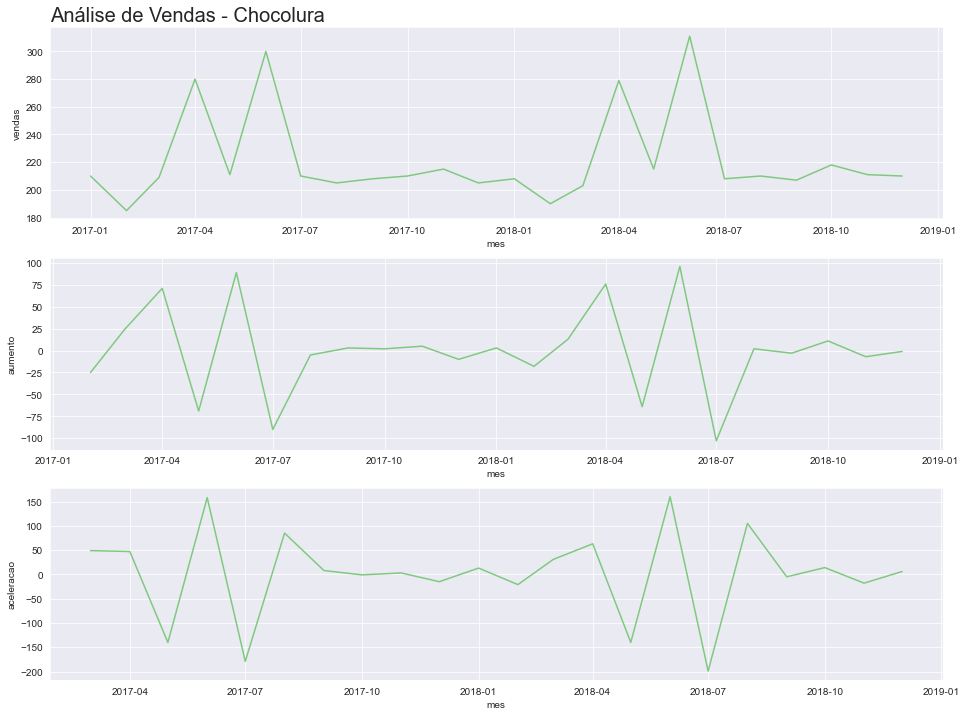

In [36]:
plot_comparacao('mes','vendas','aumento','aceleracao','Análise de Vendas - Chocolura', chocolura)

In [37]:
correlacao('Correlação Vendas - Chocolura', chocolura, 'vendas' )

NameError: name 'correlacao' is not defined

In [ ]:
chocolura.describe()

# Chocolura - Vendas diárias (Outubro e Novembro)

In [39]:
chocolura_dia = pd.read_csv('vendas_por_dia.csv')
chocolura_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
chocolura_dia.dia = pd.to_datetime(chocolura_dia.dia)

In [ ]:
chocolura_dia.dtypes

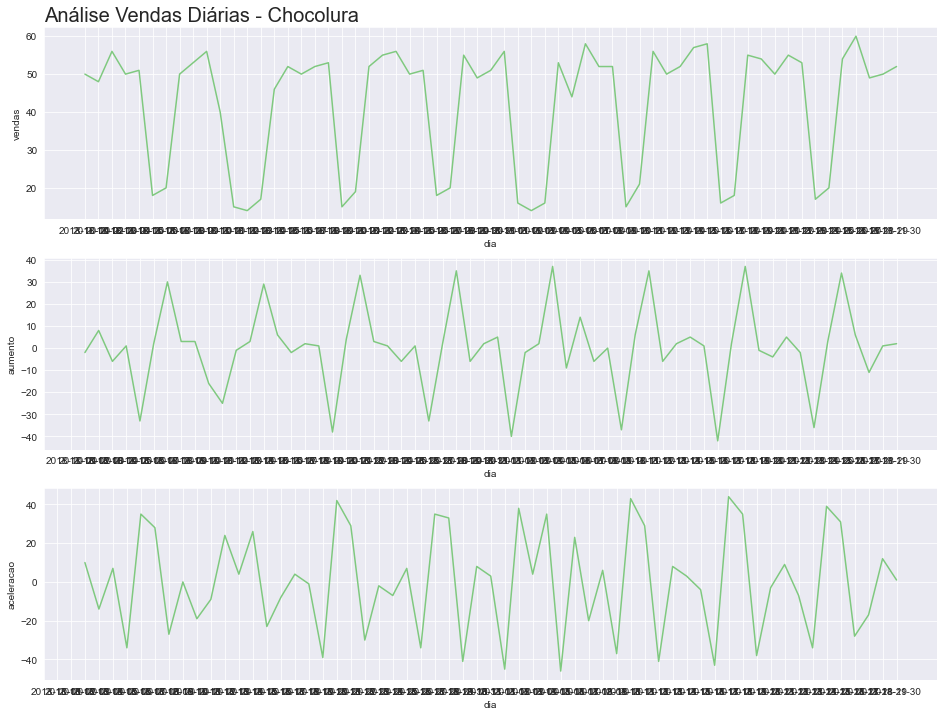

In [42]:
chocolura_dia['aumento'] = chocolura_dia.vendas.diff()
chocolura_dia['aceleracao'] = chocolura_dia.aumento.diff()
plot_comparacao('dia','vendas','aumento','aceleracao','Análise Vendas Diárias - Chocolura', chocolura_dia)



In [ ]:
chocolura_dia['dia_semana'] = chocolura_dia['dia'].dt.day_name()

In [ ]:
chocolura_dia['dia_semana'] = chocolura_dia['dia_semana'].map({'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado',
       'Sunday':'Domingo'})

In [ ]:
chocolura_dia

In [ ]:
vendas_agrupadas = chocolura_dia.groupby('dia_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

# Correlação das Vendas Diárias

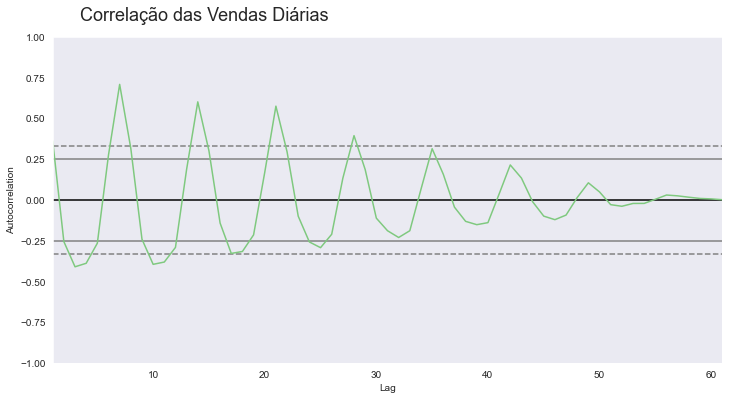

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize = 18, x= 0.3, y=0.95)
autocorrelation_plot(chocolura_dia.vendas)
ax = ax

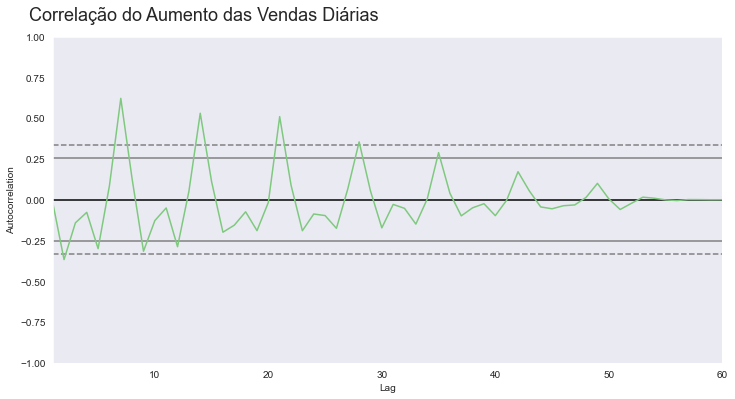

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize = 18, x= 0.3, y=0.95)
autocorrelation_plot(chocolura_dia.aumento[1:])
ax = ax

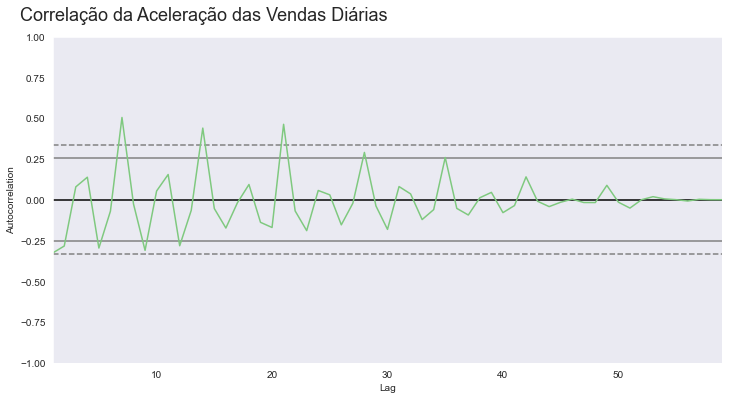

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize = 18, x= 0.3, y=0.95)
autocorrelation_plot(chocolura_dia.aceleracao[2:])
ax = ax

# Análise de Vendas - Cafelura


In [49]:
cafelura = pd.read_csv('cafelura.csv')

In [53]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [55]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


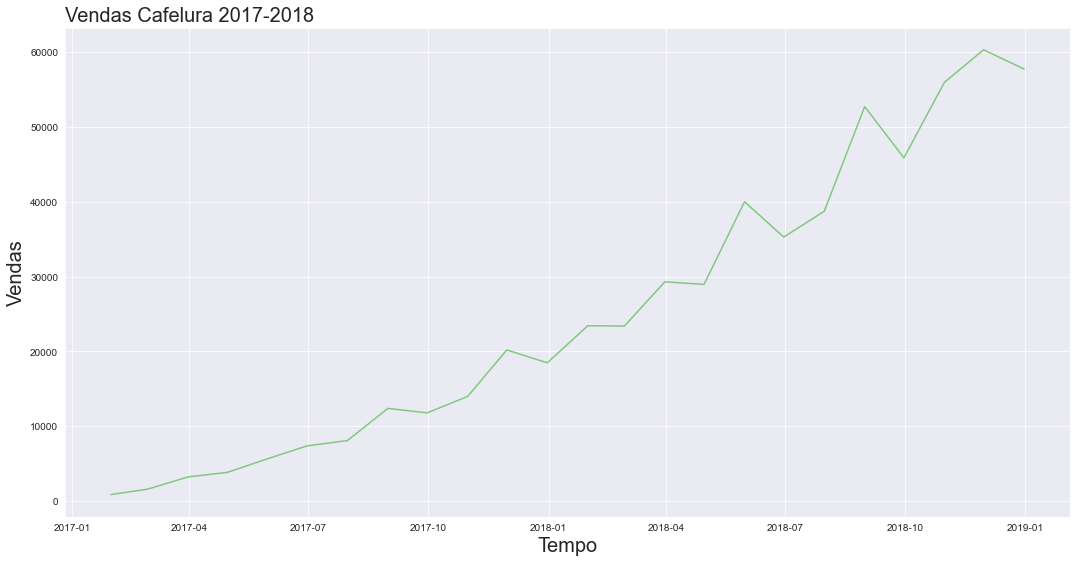

In [56]:
plotar('Vendas Cafelura 2017-2018','Tempo','Vendas','mes','vendas',cafelura)

In [58]:
dias_fds = pd.read_csv('dias_final_de_semana.csv')
dias_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [60]:
cafelura['vendas_normalizadas'] = (cafelura.vendas)/(dias_fds.quantidade_de_dias.values)
cafelura

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


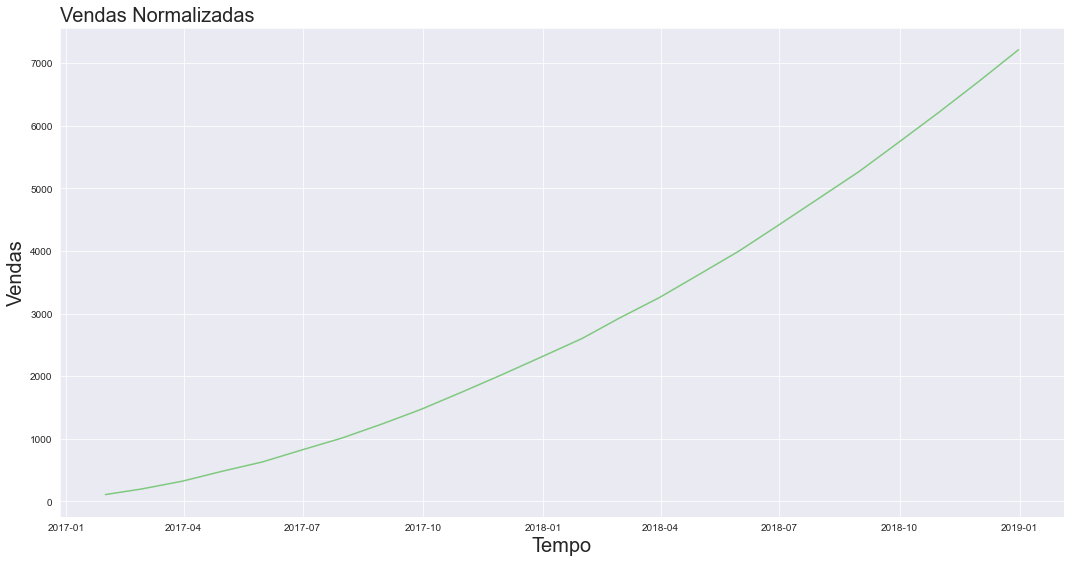

In [62]:
plotar('Vendas Normalizadas', 'Tempo','Vendas', 'mes', 'vendas_normalizadas', cafelura)

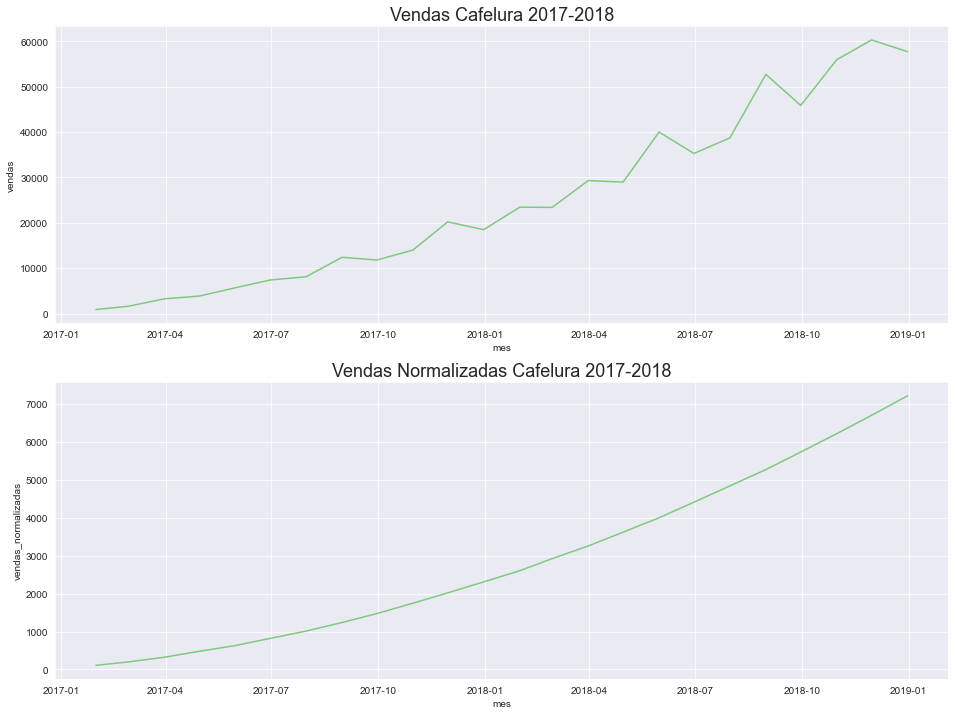

In [67]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017-2018', fontsize = 18)
sns.lineplot(x='mes', y ='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017-2018', fontsize = 18)
sns.lineplot(x='mes', y ='vendas_normalizadas', data=cafelura)
ax =ax

## StatsModels

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

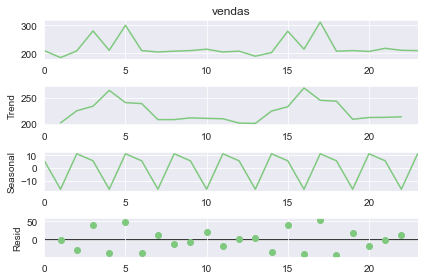

In [77]:
resultado = seasonal_decompose(chocolura['vendas'],  period=3)
ax = resultado.plot()

In [78]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [79]:
data = ({"observacao":observacao,"tendendica":tendencia,"sazonalidade":sazonalidade,"ruido":ruido})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendendica,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


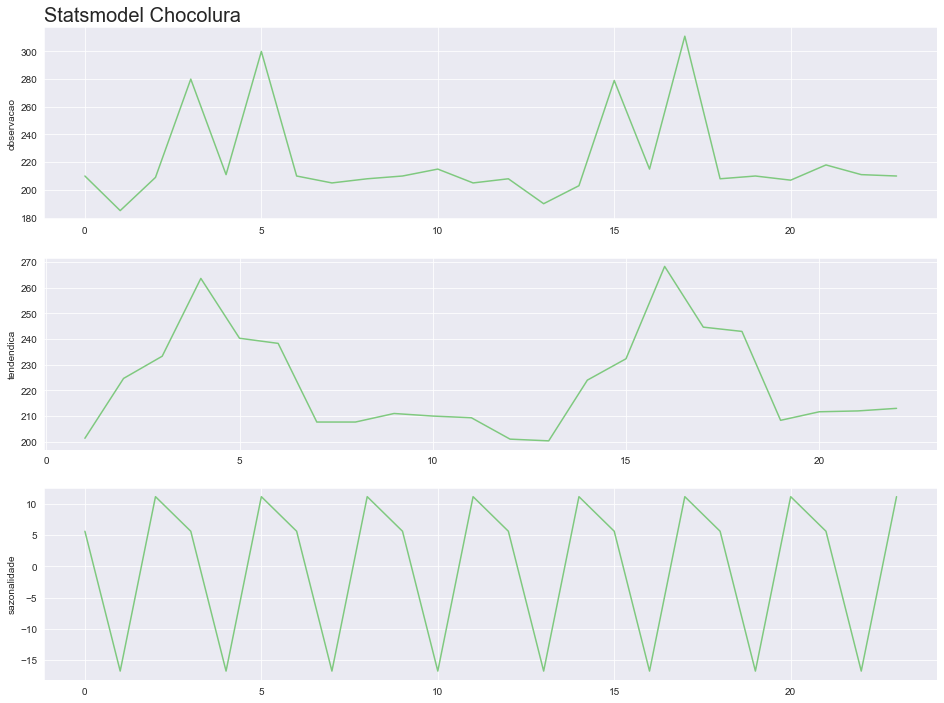

In [81]:
plot_comparacao(resultado.index, 'observacao', 'tendendica','sazonalidade', 'Statsmodel Chocolura', resultado)

In [82]:
resultado

,observacao,tendendica,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508
5,300.0,240.333333,11.126984,48.539683
6,210.0,238.333333,5.603175,-33.936508
7,205.0,207.666667,-16.730159,14.063492
8,208.0,207.666667,11.126984,-10.793651
9,210.0,211.000000,5.603175,-6.603175


# Análise de Vendas  - Alucel

In [84]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [86]:
alucel.dia = pd.to_datetime(alucel.dia)

In [87]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [90]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()

In [91]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


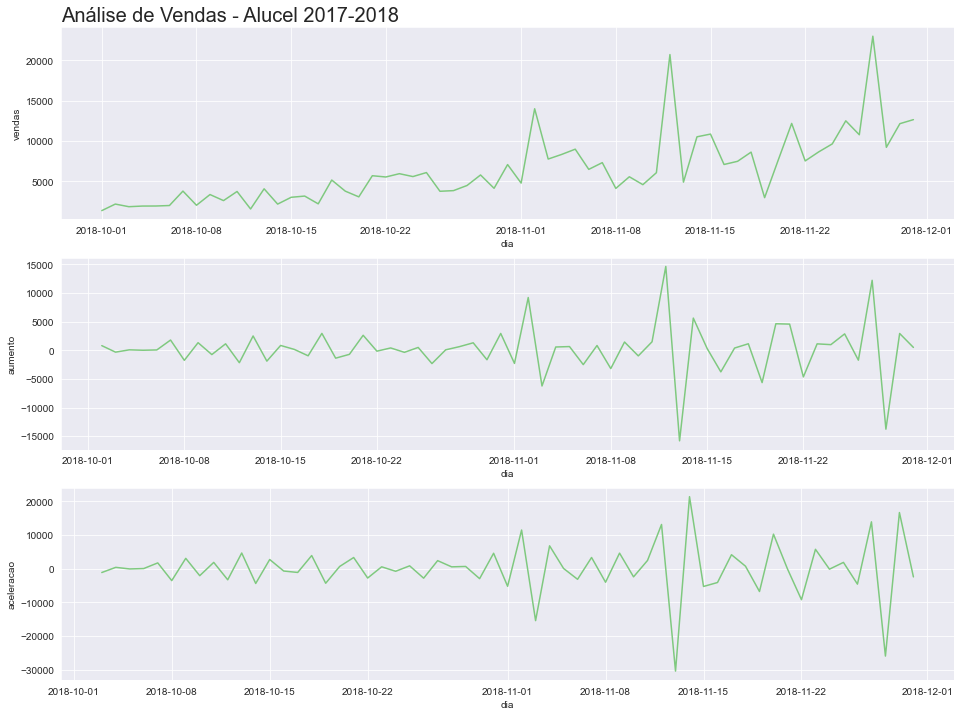

In [92]:
plot_comparacao('dia','vendas','aumento','aceleracao','Análise de Vendas - Alucel 2017-2018', alucel)

## Média Móvel

In [102]:
alucel['media_movel'] = alucel.vendas.rolling(21).mean()

In [98]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,NaN
8,2018-10-09,3365.58,1325.99,3079.47,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,NaN


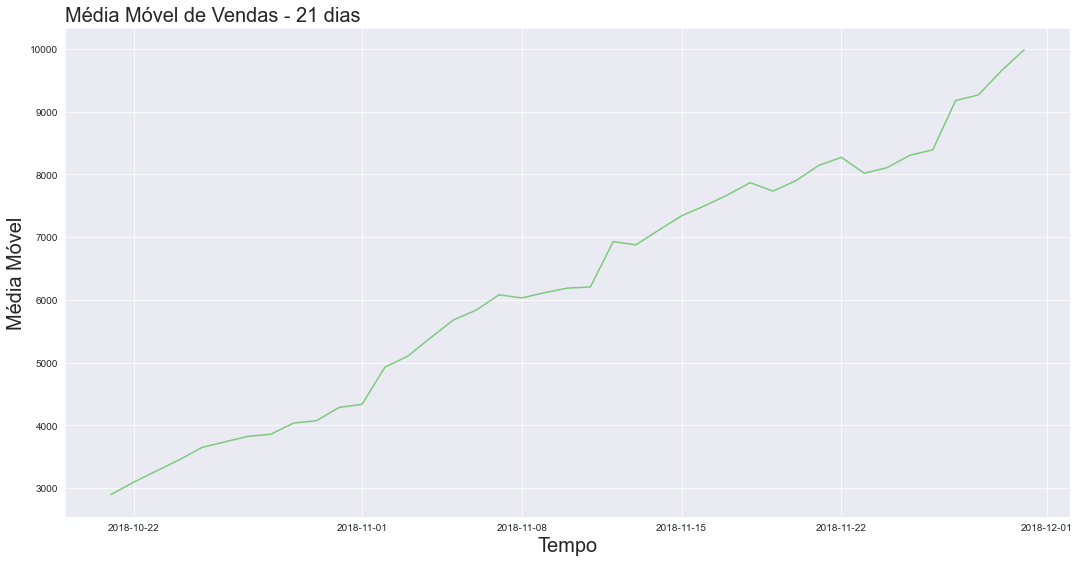

In [103]:
plotar('Média Móvel de Vendas - 21 dias', 'Tempo','Média Móvel', 'dia', 'media_movel', alucel)